# Importing library's

In [2]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the Data

In [ ]:
baba_short_data = yf.download("TM", period="1mo", interval="2m")

[*********************100%***********************]  1 of 1 completed


# Exploratory Analysis

In [ ]:
baba_short_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM
Datetime,,,,,
2024-12-30 14:30:00+00:00,197.800003,198.000000,197.399994,198.000000,17075
2024-12-30 14:32:00+00:00,197.250000,197.949997,197.250000,197.949997,5514
2024-12-30 14:34:00+00:00,197.169998,197.179993,196.809998,197.110001,6399
2024-12-30 14:36:00+00:00,197.199997,197.315002,196.868195,197.240005,5487
2024-12-30 14:38:00+00:00,197.630005,197.630005,197.009995,197.009995,2106


In [ ]:
# rename the columns
new_column_names = ["Close", "High", "Low", "Open", "Volume"]
baba_short_data.columns = new_column_names

In [ ]:
# download the data
baba_short_data.to_csv('baba_short_data.csv')

# Loading the data

In [3]:
baba_short_data = pd.read_csv('baba_short_data.csv')

In [4]:
baba_short_data.head()

,Datetime,Close,High,Low,Open,Volume
0,2024-12-30 14:30:00+00:00,197.800003,198.000000,197.399994,198.000000,17075
1,2024-12-30 14:32:00+00:00,197.250000,197.949997,197.250000,197.949997,5514
2,2024-12-30 14:34:00+00:00,197.169998,197.179993,196.809998,197.110001,6389
3,2024-12-30 14:36:00+00:00,197.199997,197.315002,196.868195,197.240005,5497
4,2024-12-30 14:38:00+00:00,197.630005,197.630005,197.009995,197.009995,2106


In [5]:
baba_short_data.shape

(3300, 6)

## Univariate Analysis

In [6]:
baba_short_data.describe()

,Close,High,Low,Open,Volume
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,188.345276,188.395141,188.295822,188.346864,2283.421212
std,4.794287,4.803008,4.787286,4.795574,3826.214001
min,179.717300,179.979996,179.717300,179.770004,100.000000
25%,184.949997,184.990005,184.910004,184.949997,771.000000
50%,186.589996,186.630005,186.558998,186.592499,1400.000000
75%,193.419998,193.479996,193.360001,193.419998,2504.250000
max,197.800003,198.000000,197.399994,198.000000,96905.000000


In [7]:
baba_short_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  3300 non-null   object 
 1   Close     3300 non-null   float64
 2   High      3300 non-null   float64
 3   Low       3300 non-null   float64
 4   Open      3300 non-null   float64
 5   Volume    3300 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 154.8+ KB


In [9]:
# change Datetime
baba_short_data['Datetime'] = pd.to_datetime(baba_short_data['Datetime'])

In [11]:
# Skewness and Kurtosis
print("Skewness:", baba_short_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", baba_short_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close     0.262901
High      0.264068
Low       0.261203
Open      0.262511
Volume    9.653634
dtype: float64
Kurtosis: Close      -1.275490
High       -1.277300
Low        -1.273038
Open       -1.274032
Volume    158.725858
dtype: float64


## Check for Missing Values

In [12]:
# check for the missing values
baba_short_data.isnull().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0


## Distribution Analysis

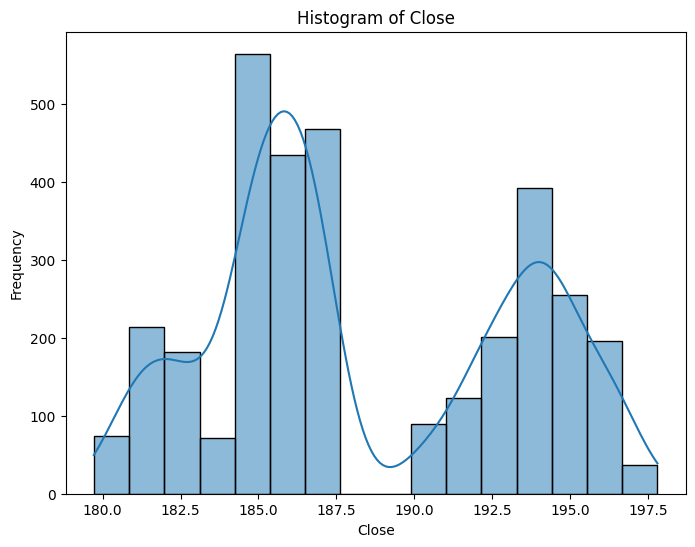

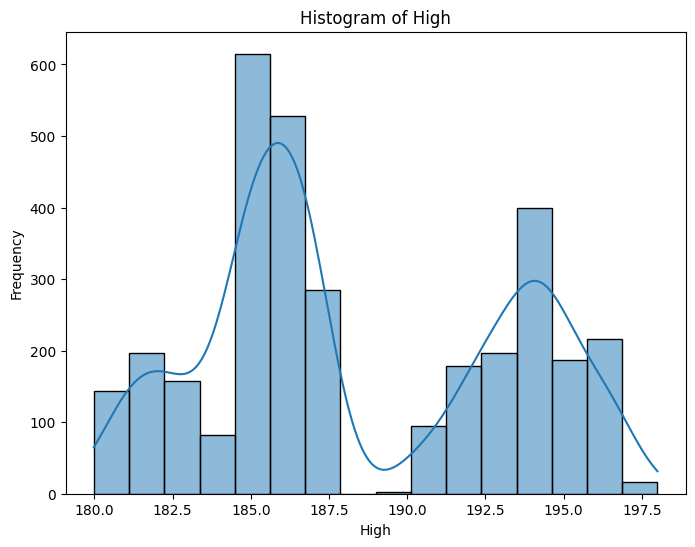

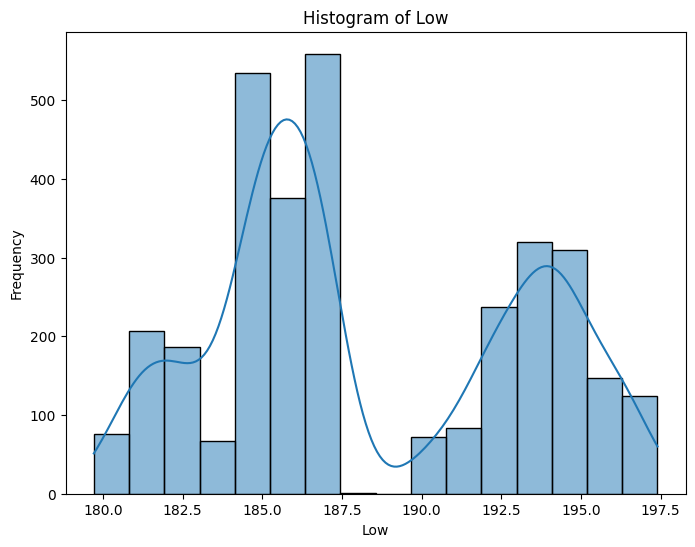

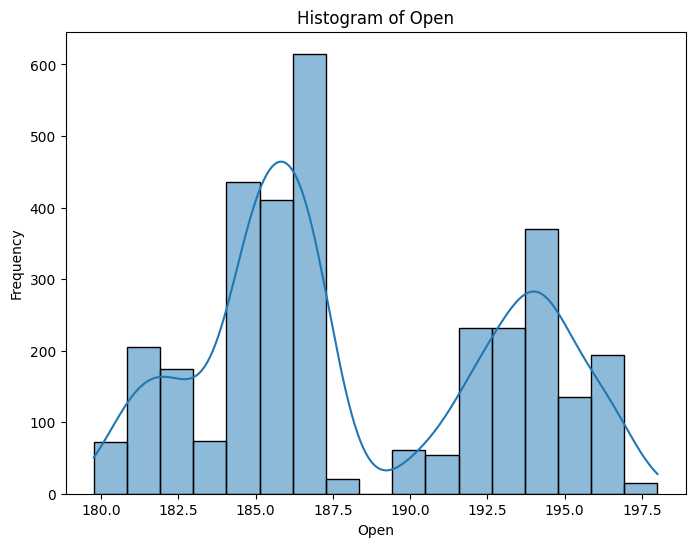

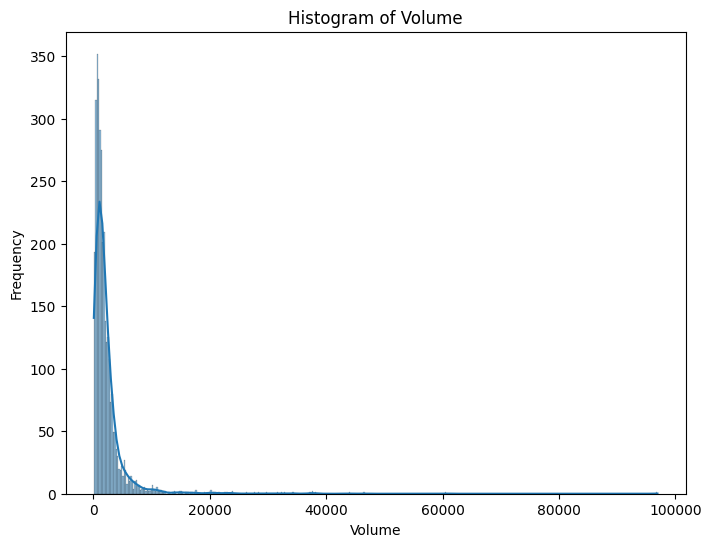

In [14]:
# Identify numerical columns
numerical_columns = baba_short_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(baba_short_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(baba_short_data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

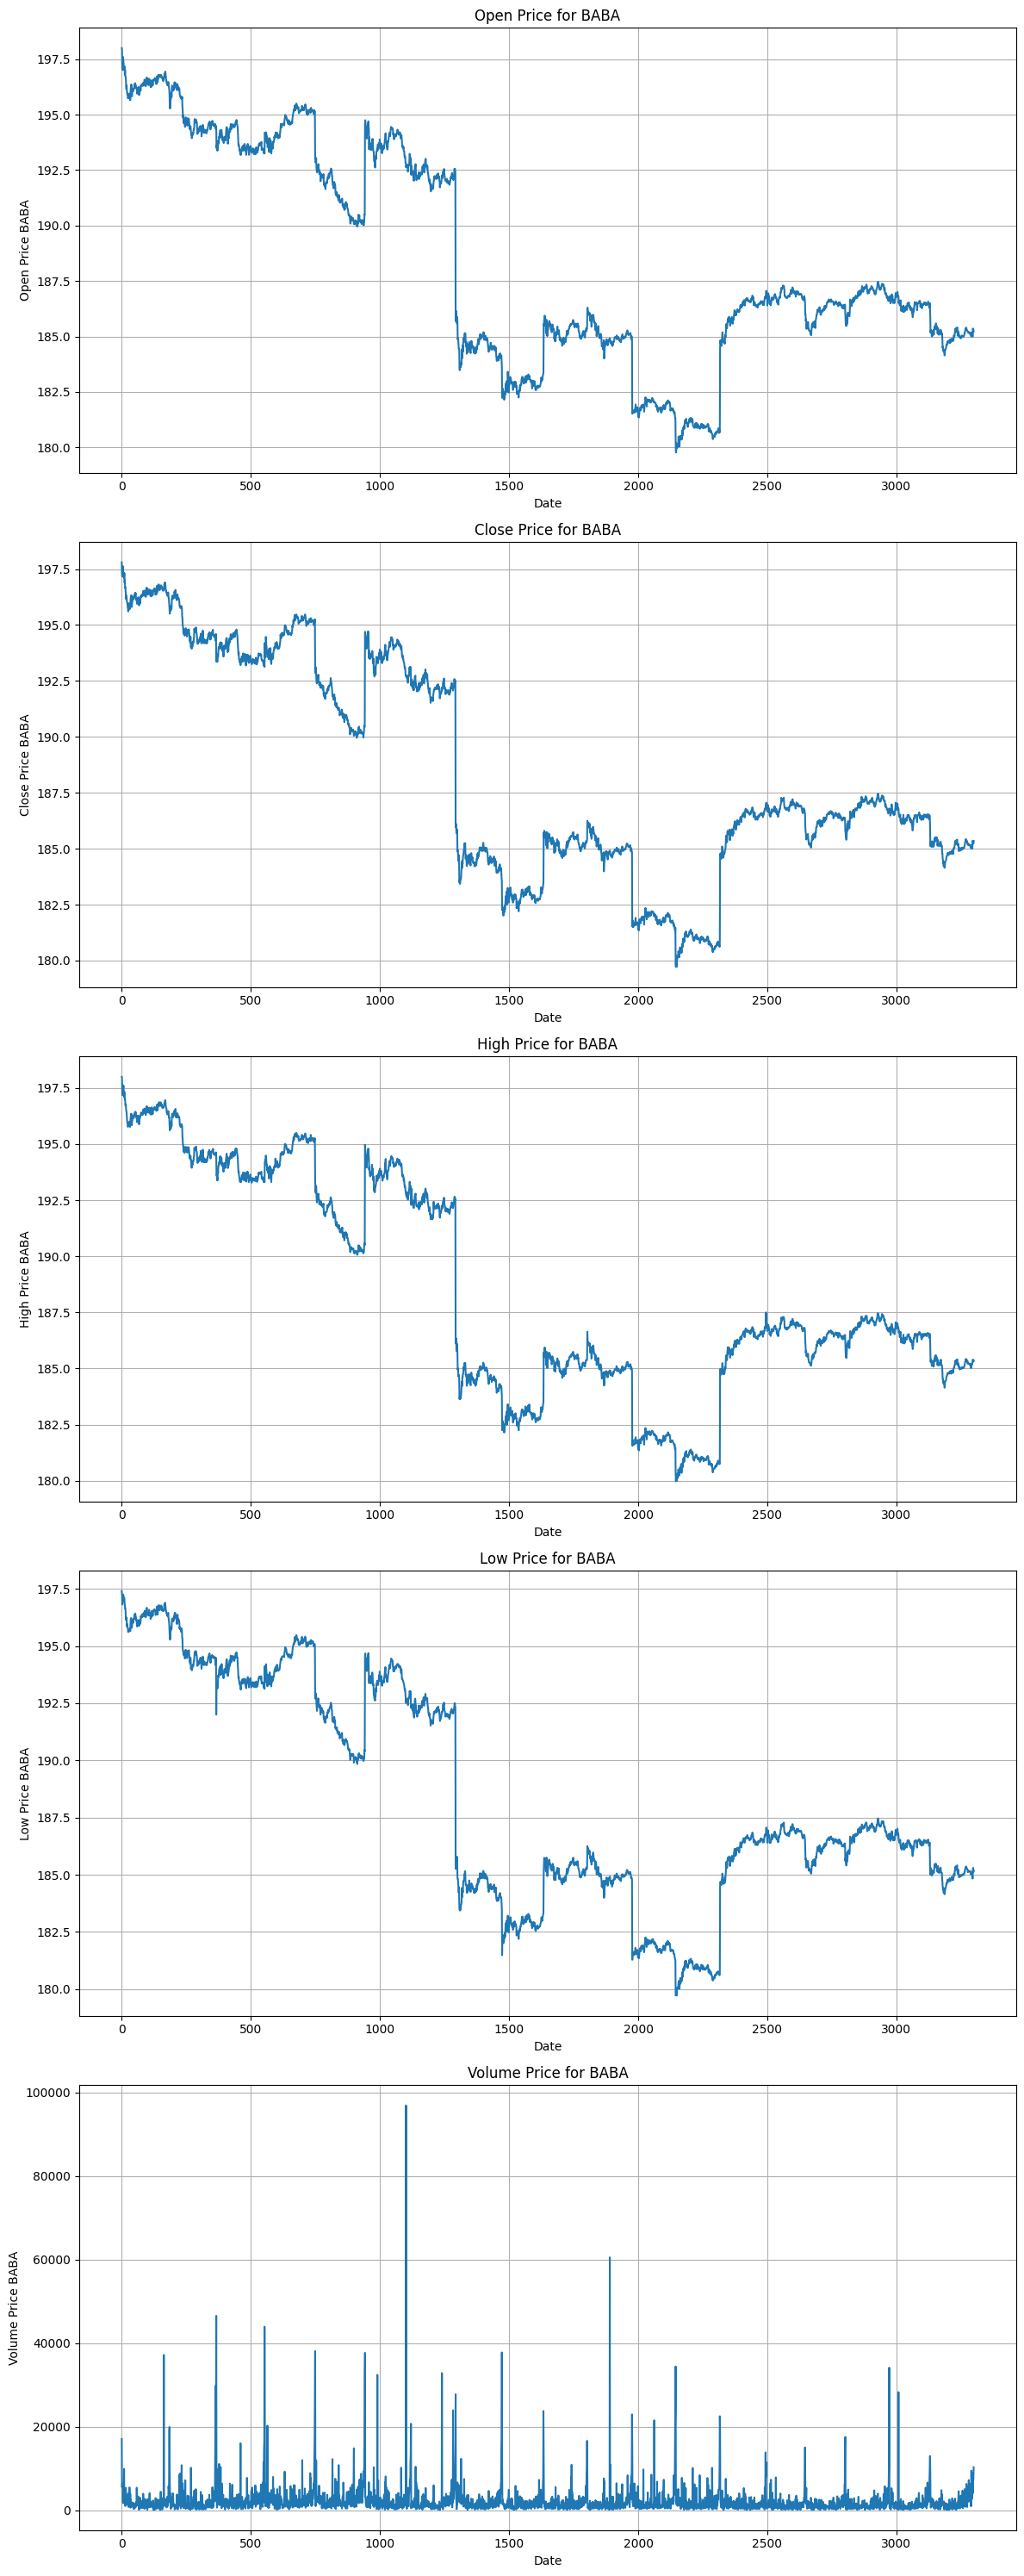

In [17]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(baba_short_data.index, baba_short_data[col])
    axes[i].set_title(f'{col} Price for BABA')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price BABA')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

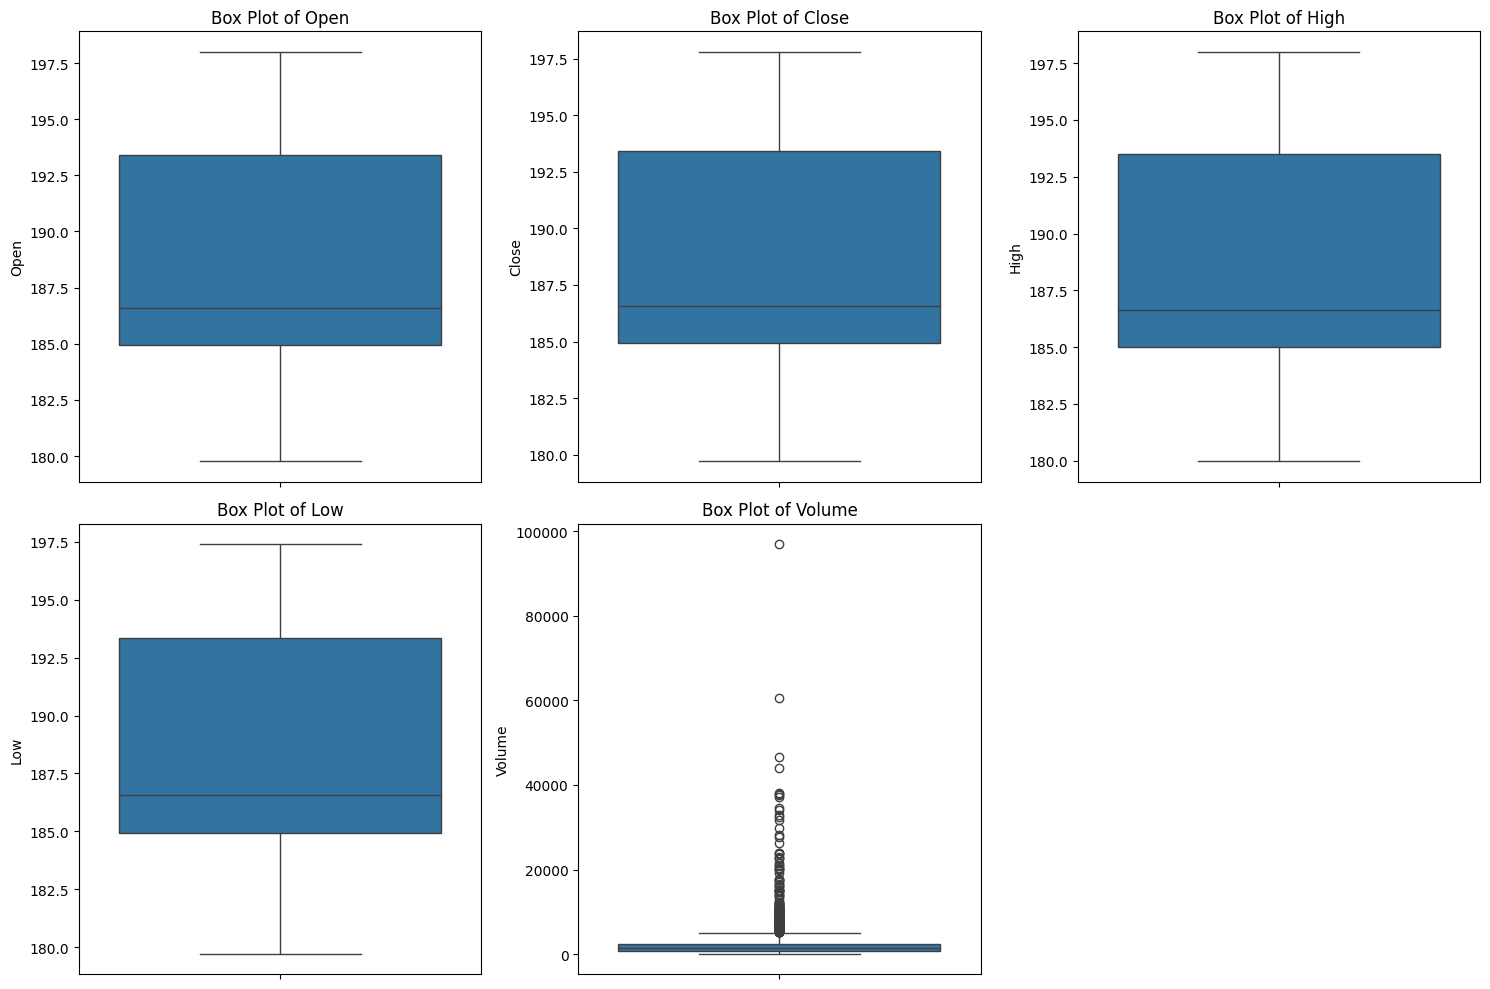

In [21]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=baba_short_data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [22]:
baba_short_data

,Datetime,Close,High,Low,Open,Volume
0,2024-12-30 14:30:00+00:00,197.800003,198.000000,197.399994,198.000000,17075
1,2024-12-30 14:32:00+00:00,197.250000,197.949997,197.250000,197.949997,5514
2,2024-12-30 14:34:00+00:00,197.169998,197.179993,196.809998,197.110001,6389
3,2024-12-30 14:36:00+00:00,197.199997,197.315002,196.868195,197.240005,5497
4,2024-12-30 14:38:00+00:00,197.630005,197.630005,197.009995,197.009995,2106
...,...,...,...,...,...,...
3295,2025-01-28 20:50:00+00:00,185.360001,185.369995,184.830002,184.990005,6399
3296,2025-01-28 20:52:00+00:00,185.309998,185.369995,185.250000,185.360001,4086
3297,2025-01-28 20:54:00+00:00,185.339996,185.399994,185.300003,185.300003,6993
3298,2025-01-28 20:56:00+00:00,185.229996,185.309998,185.110001,185.309998,7532


## Bivariate Analysis

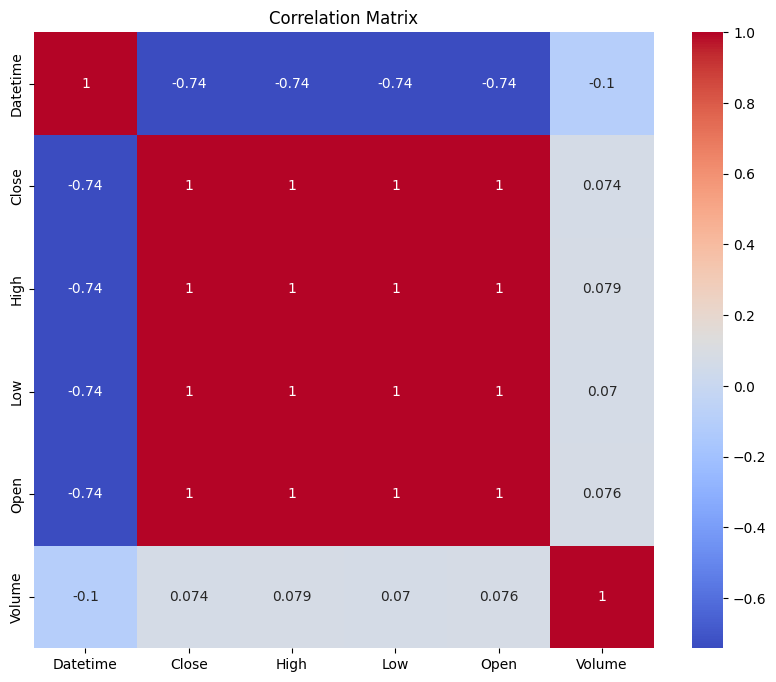

In [25]:
correlation_matrix = baba_short_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

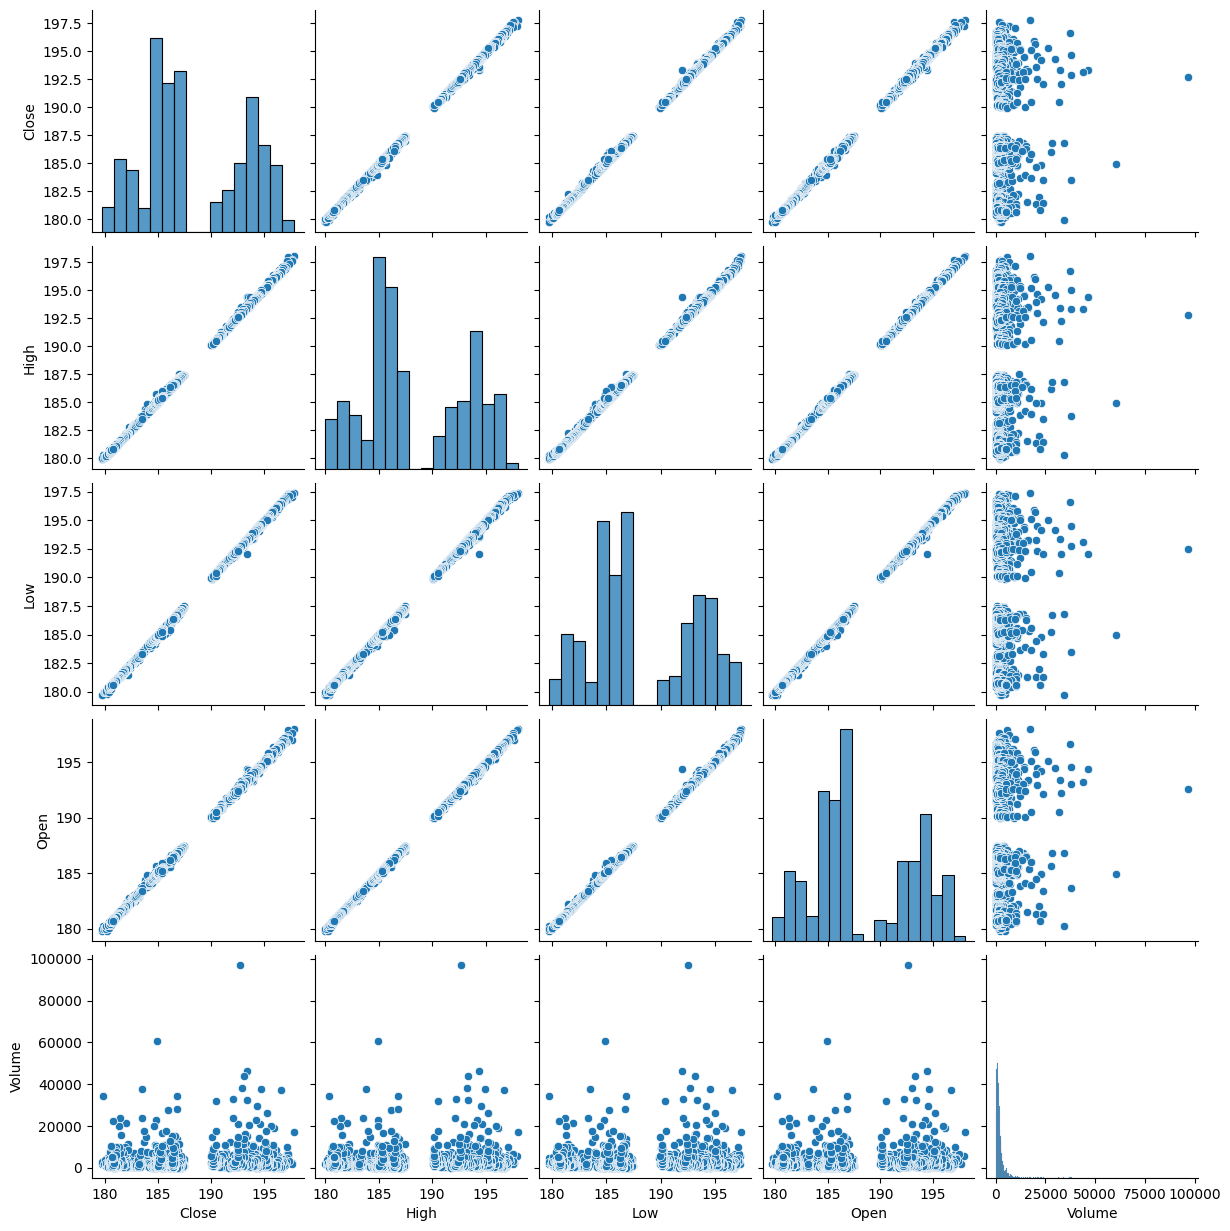

In [23]:
# Generates scatter plots for all pairs of numerical columns
sns.pairplot(baba_short_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'Relationship between Close Price and Trading Volume')

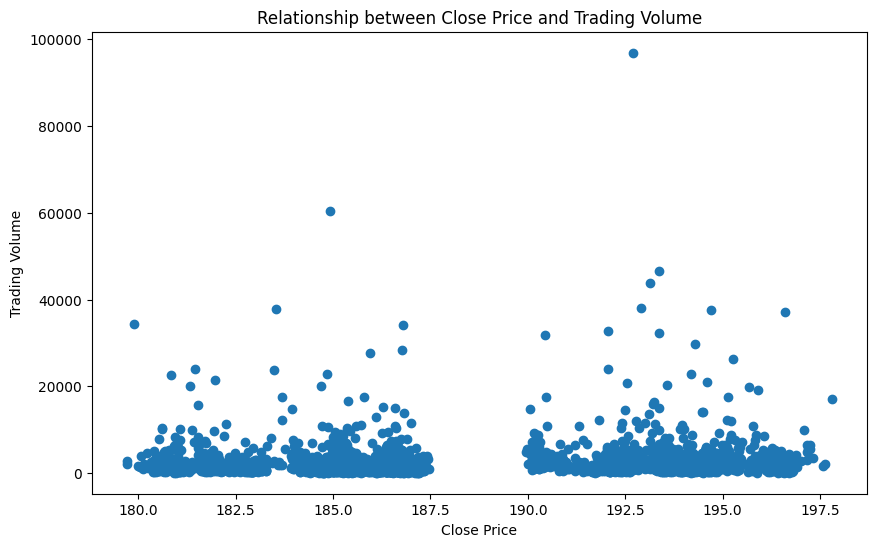

In [24]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(baba_short_data['Close'], baba_short_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('Relationship between Close Price and Trading Volume')

# Feature Engineering

In [26]:
# Moving Average (SMA) with a 5-day window
window_sma = 5
baba_short_data['SMA'] = baba_short_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 5-day window
baba_short_data['StdDev'] = baba_short_data['Close'].rolling(window=window_sma).std()
baba_short_data['UpperBand'] = baba_short_data['SMA'] + (2 * baba_short_data['StdDev'])
baba_short_data['LowerBand'] = baba_short_data['SMA'] - (2 * baba_short_data['StdDev'])

# RSI with a 7-day window
def calculate_rsi(data, window=7):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

baba_short_data['RSI'] = calculate_rsi(baba_short_data)

In [62]:
# Calculate moving averages
baba_short_data['MA_5'] = baba_short_data['Close'].rolling(window=5).mean()
baba_short_data['MA_10'] = baba_short_data['Close'].rolling(window=10).mean()


In [28]:
baba_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,4
StdDev,4
UpperBand,4
LowerBand,4


In [29]:
# fill na with mean
baba_short_data.fillna(baba_short_data.mean(), inplace=True)

In [30]:
baba_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


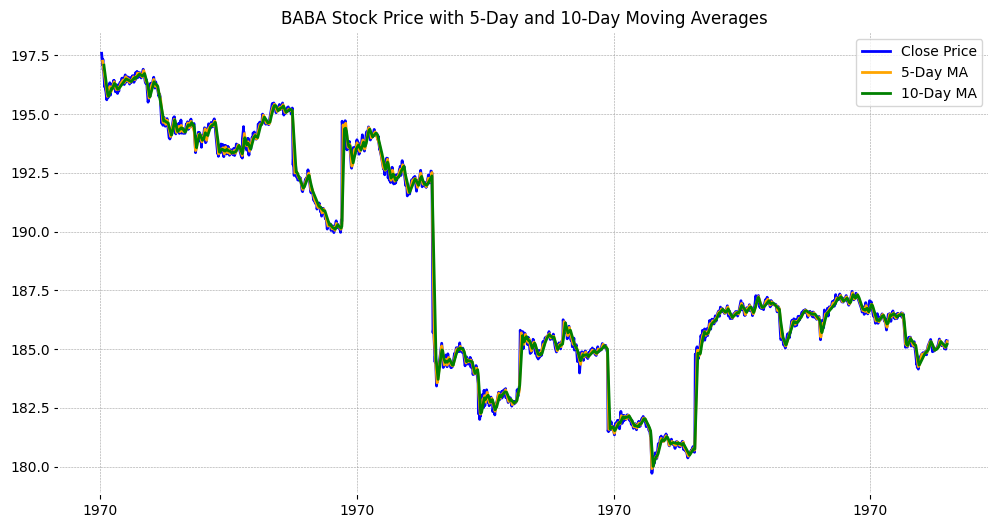

In [64]:
# plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(baba_short_data['Close'], label='Close Price', color='blue')
plt.plot(baba_short_data['MA_5'], label='5-Day MA', color='orange')
plt.plot(baba_short_data['MA_10'], label='10-Day MA', color='green')
plt.title('BABA Stock Price with 5-Day and 10-Day Moving Averages')
plt.legend()
plt.show()

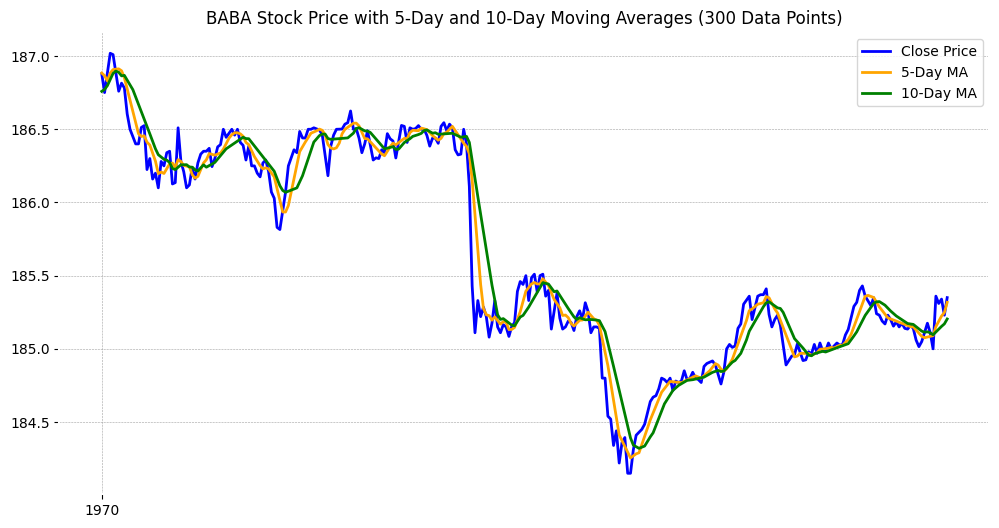

In [68]:
# plot the moving averages for 300 data points
plt.figure(figsize=(12, 6))
plt.plot(baba_short_data['Close'][-300:], label='Close Price', color='blue')
plt.plot(baba_short_data['MA_5'][-300:], label='5-Day MA', color='orange')
plt.plot(baba_short_data['MA_10'][-300:], label='10-Day MA', color='green')
plt.title('BABA Stock Price with 5-Day and 10-Day Moving Averages (300 Data Points)')
plt.legend()
plt.show()

In [69]:
baba_short_data.head()

,Datetime,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI,Daily_Return,Rolling_Volatility,Close_diff,MA_5,MA_10
1970-01-01 00:00:00.000000005,2024-12-30 14:40:00+00:00,197.589996,197.600006,197.250000,197.600006,1705,197.367999,0.223205,197.814410,196.921588,49.945929,-0.020244,0.176722,-0.040009,NaN,NaN
1970-01-01 00:00:00.000000006,2024-12-30 14:42:00+00:00,197.255005,197.535904,197.220001,197.479996,6499,197.369000,0.222554,197.814109,196.923892,31.399527,-0.169539,0.140158,-0.334991,NaN,NaN
1970-01-01 00:00:00.000000007,2024-12-30 14:44:00+00:00,197.169998,197.589996,197.169998,197.320007,3100,197.369000,0.222554,197.814109,196.923892,29.677502,-0.043095,0.140348,-0.085007,NaN,NaN
1970-01-01 00:00:00.000000008,2024-12-30 14:46:00+00:00,197.160004,197.169998,197.100006,197.154999,4861,197.361002,0.230716,197.822433,196.899570,45.544779,-0.005069,0.140094,-0.009995,NaN,NaN
1970-01-01 00:00:00.000000009,2024-12-30 14:48:00+00:00,197.089996,197.100006,197.089996,197.100006,9909,197.253000,0.197280,197.647561,196.858439,45.999969,-0.035508,0.065843,-0.070007,197.253,NaN


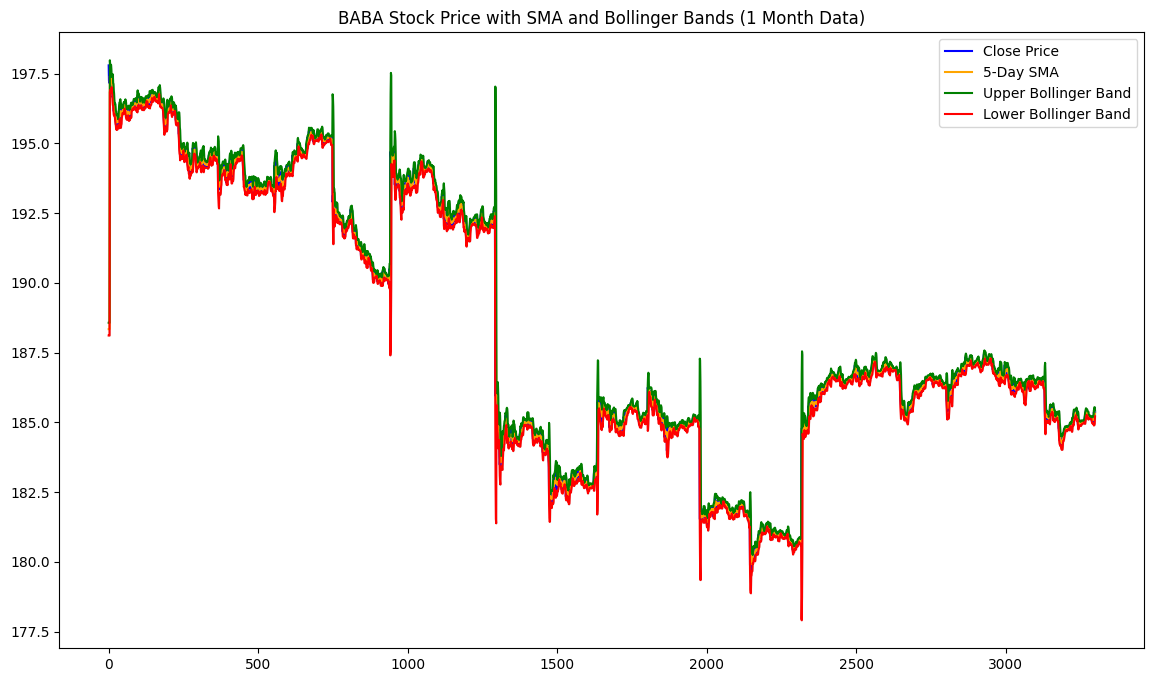

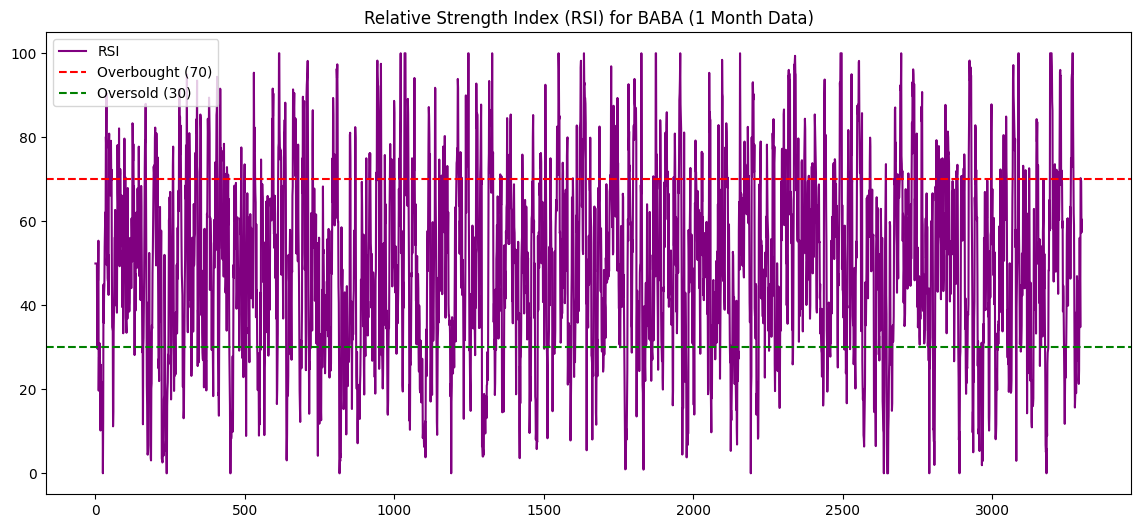

In [31]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(baba_short_data['Close'], label='Close Price', color='blue')
plt.plot(baba_short_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(baba_short_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(baba_short_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(baba_short_data.index, baba_short_data['UpperBand'], baba_short_data['LowerBand'], color='gray', alpha=0.3)
plt.title('BABA Stock Price with SMA and Bollinger Bands (1 Month Data)')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(baba_short_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for BABA (1 Month Data)')
plt.legend()
plt.show()

In [32]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.0 MB/s eta 0:00:00


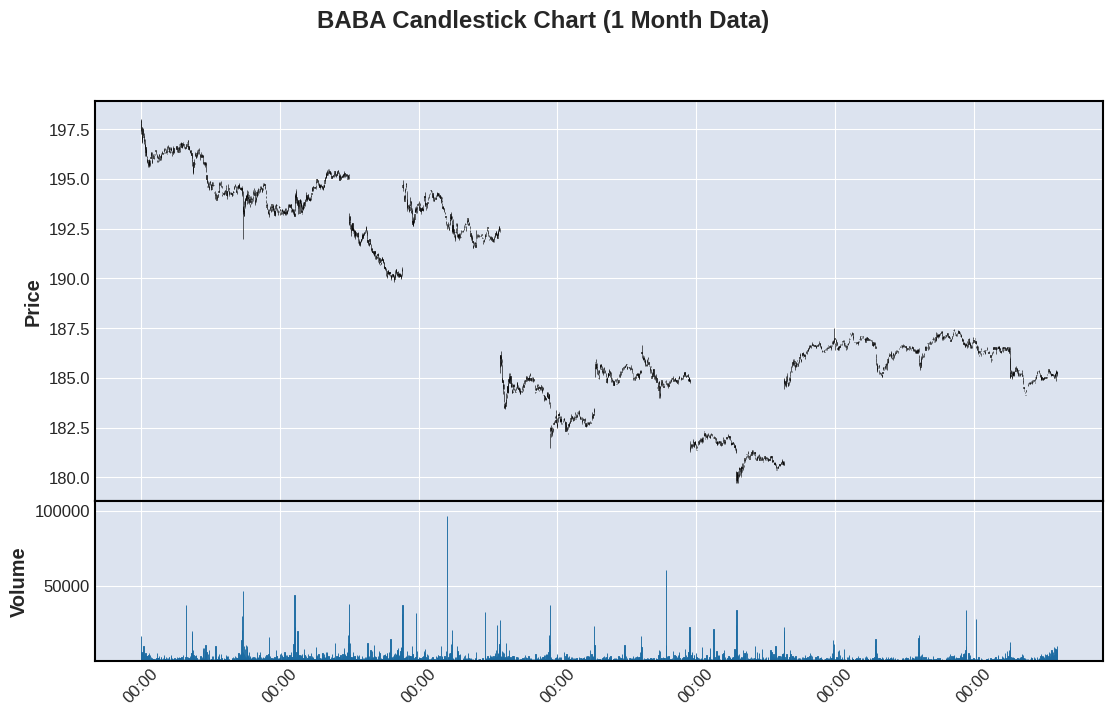

In [34]:
# plot candlestick for Close
import mplfinance as mpf
baba_short_data.index = pd.to_datetime(baba_short_data.index)
mpf.plot(baba_short_data, type='candle', volume=True, figsize=(14, 8), title='BABA Candlestick Chart (1 Month Data)')


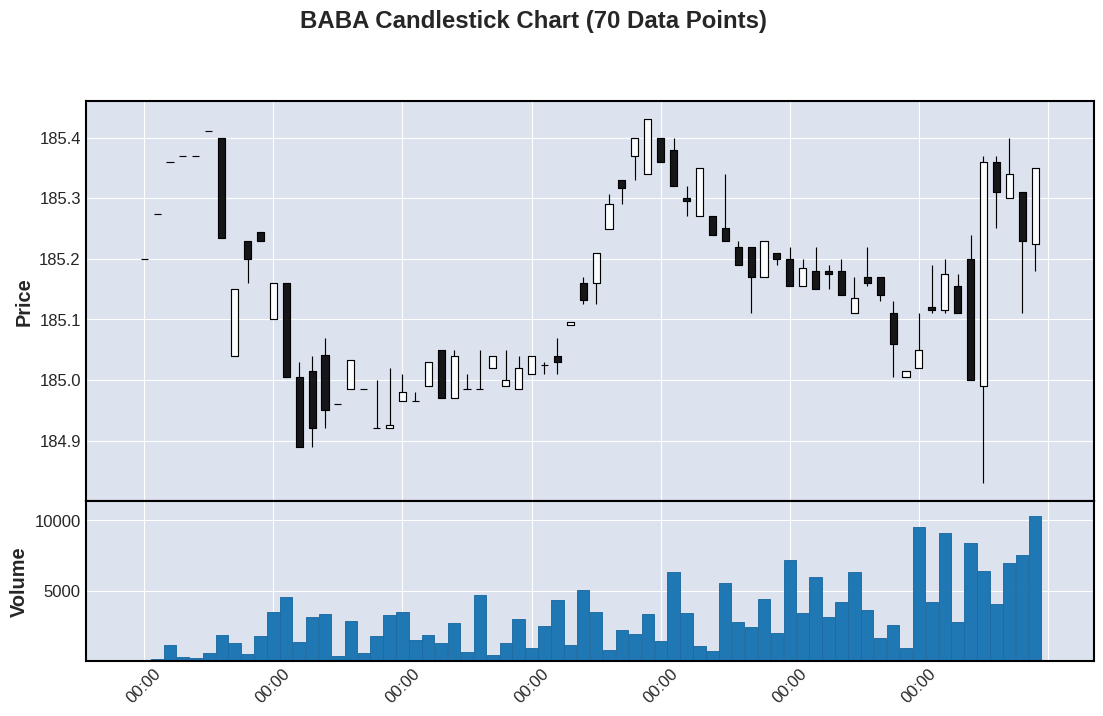

In [48]:
# plot candelstic for Close for two week from the given data
import mplfinance as mpf
baba_short_data.index = pd.to_datetime(baba_short_data.index)
mpf.plot(baba_short_data.tail(70), type='candle', volume=True, figsize=(14, 8), title='BABA Candlestick Chart (70 Data Points)')


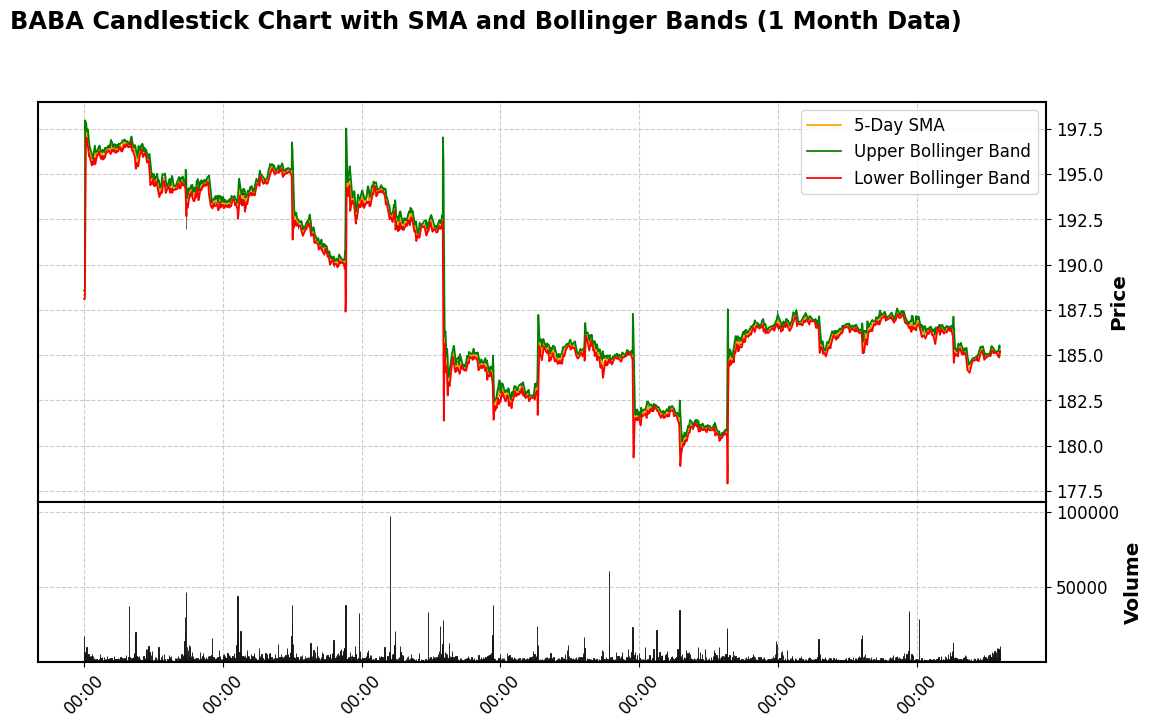

In [50]:
# plots for SMA and Bollinger Bands
ap = [
    mpf.make_addplot(baba_short_data['SMA'], color='orange', label='5-Day SMA'),
    mpf.make_addplot(baba_short_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(baba_short_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    baba_short_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='BABA Candlestick Chart with SMA and Bollinger Bands (1 Month Data)',
    style='classic'
)

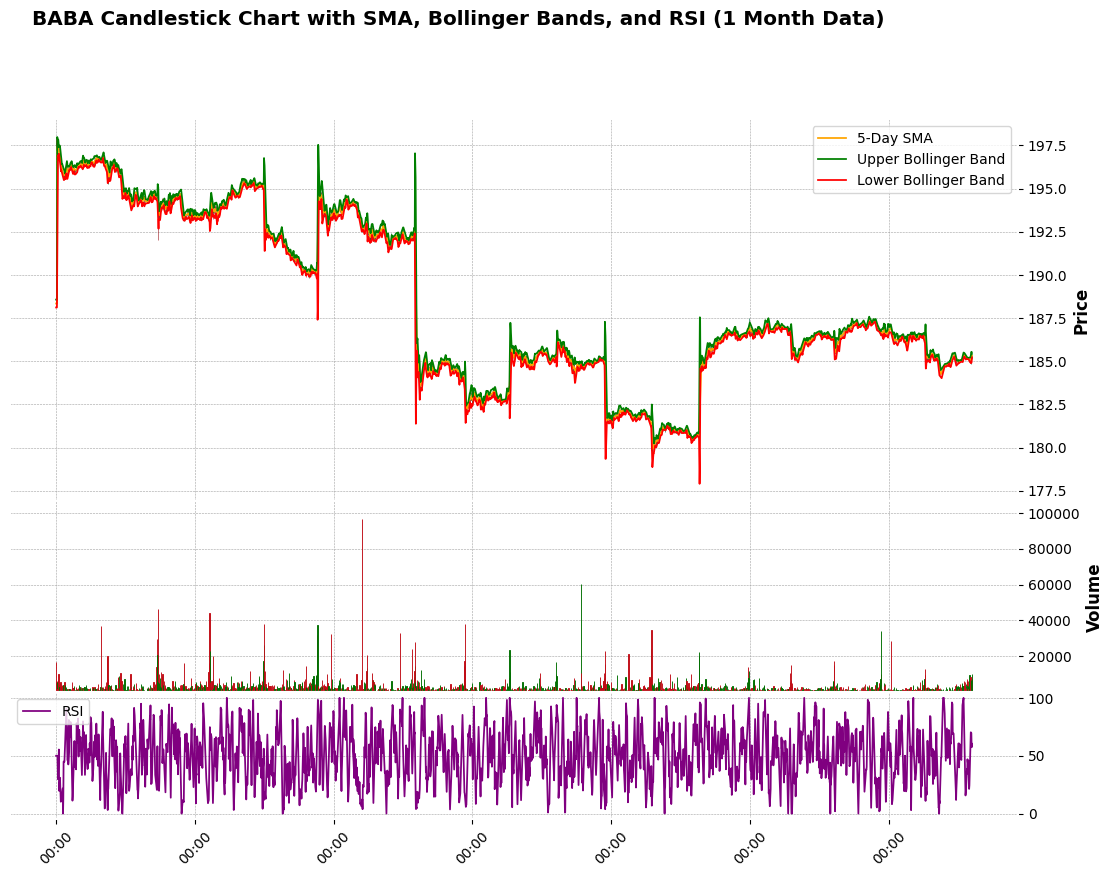

In [51]:
# Create additional plots for SMA, Bollinger Bands, and RSI
ap = [
    mpf.make_addplot(baba_short_data['SMA'], color='orange', label='5-Day SMA'),
    mpf.make_addplot(baba_short_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(baba_short_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(baba_short_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    baba_short_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='BABA Candlestick Chart with SMA, Bollinger Bands, and RSI (1 Month Data)',
    style='charles',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)

## Time Series Decomposition

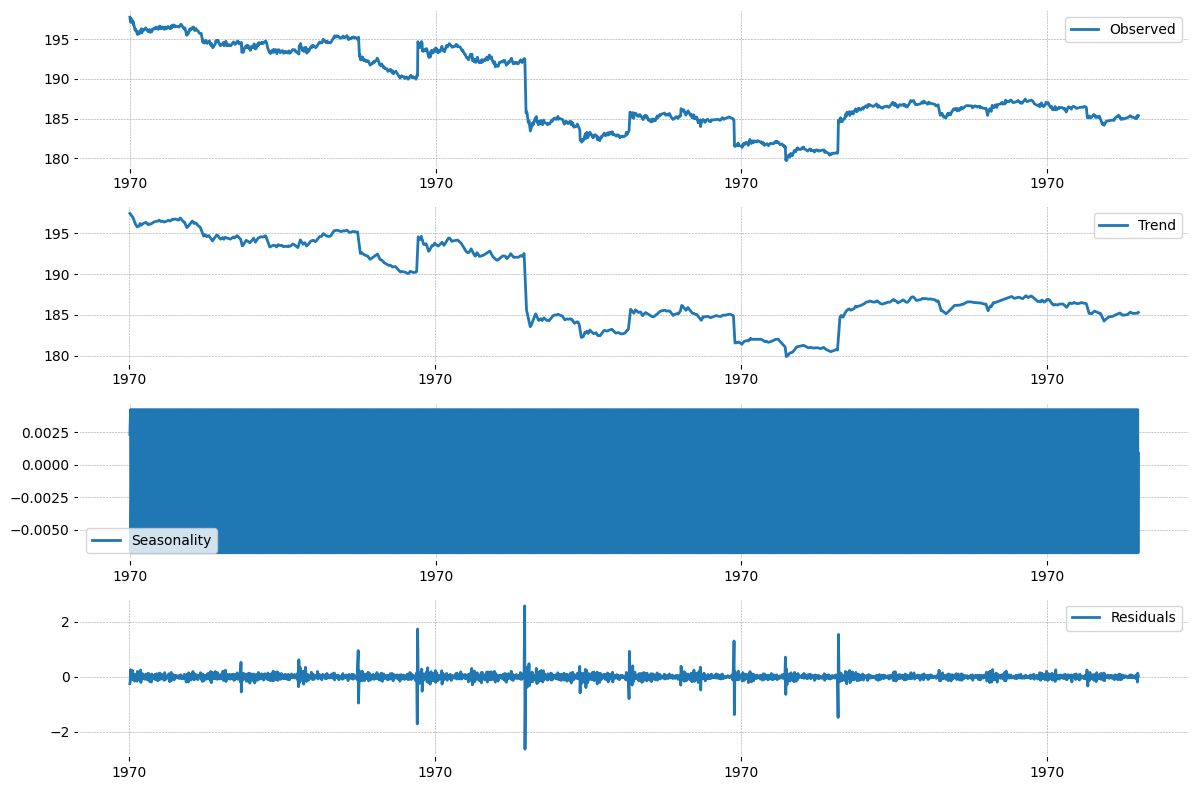

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(baba_short_data['Close'], model='additive', period=5)  # Weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 0.12%


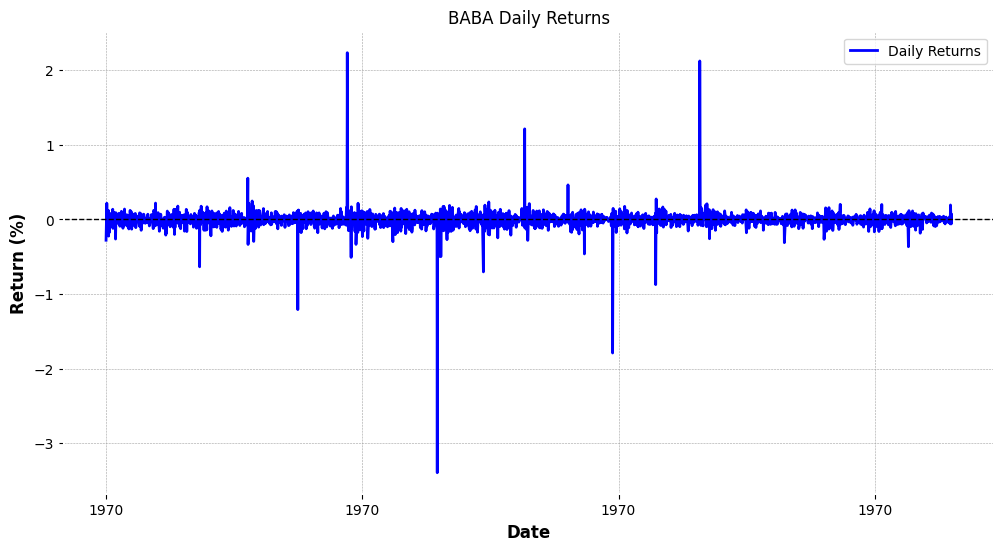

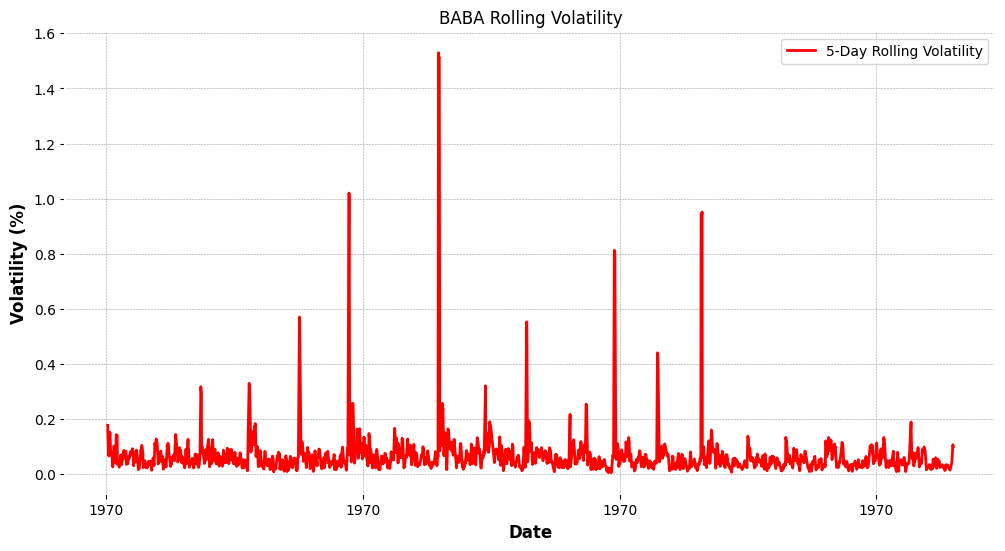

In [53]:
# Calculate daily returns
baba_short_data['Daily_Return'] = baba_short_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = baba_short_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(baba_short_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('BABA Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
baba_short_data['Rolling_Volatility'] = baba_short_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(baba_short_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('BABA Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

# Stationarity Test

In [54]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(baba_short_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.8725818233041944
p-value: 0.34506734908301473
Critical Values:
   1%: -3.4323379727696124
   5%: -2.86241836872506
   10%: -2.567237573900571
The data is non-stationary (fail to reject the null hypothesis).


In [55]:
# Apply differencing
baba_short_data['Close_diff'] = baba_short_data['Close'].diff().dropna()

In [70]:
baba_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [57]:
# drop na
baba_short_data.dropna(inplace=True)

In [58]:
# Recheck stationarity using ADF test
result = adfuller(baba_short_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -60.72505645836674
p-value: 0.0
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

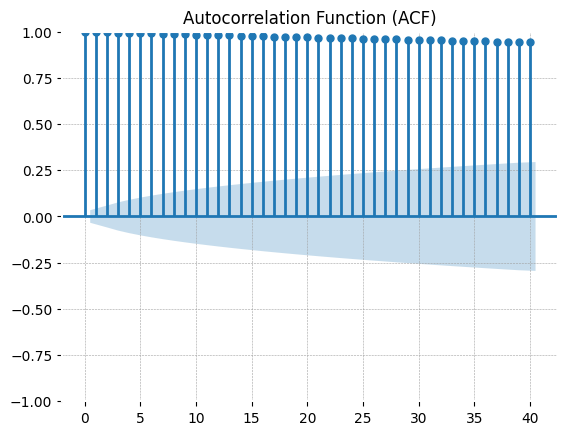

In [59]:
plt.figure(figsize=(10, 5))
plot_acf(baba_short_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

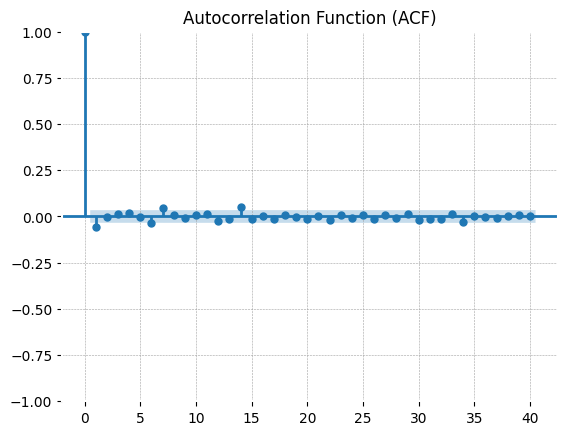

In [60]:
plt.figure(figsize=(10, 5))
plot_acf(baba_short_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# LSTM Model

In [71]:
# get the Date out of the index
baba_short_data.reset_index(inplace=True)

In [72]:
baba_short_data

,index,Datetime,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI,Daily_Return,Rolling_Volatility,Close_diff,MA_5,MA_10
0,1970-01-01 00:00:00.000000005,2024-12-30 14:40:00+00:00,197.589996,197.600006,197.250000,197.600006,1705,197.367999,0.223205,197.814410,196.921588,49.945929,-0.020244,0.176722,-0.040009,NaN,NaN
1,1970-01-01 00:00:00.000000006,2024-12-30 14:42:00+00:00,197.255005,197.535904,197.220001,197.479996,6499,197.369000,0.222554,197.814109,196.923892,31.399527,-0.169539,0.140158,-0.334991,NaN,NaN
2,1970-01-01 00:00:00.000000007,2024-12-30 14:44:00+00:00,197.169998,197.589996,197.169998,197.320007,3100,197.369000,0.222554,197.814109,196.923892,29.677502,-0.043095,0.140348,-0.085007,NaN,NaN
3,1970-01-01 00:00:00.000000008,2024-12-30 14:46:00+00:00,197.160004,197.169998,197.100006,197.154999,4861,197.361002,0.230716,197.822433,196.899570,45.544779,-0.005069,0.140094,-0.009995,NaN,NaN
4,1970-01-01 00:00:00.000000009,2024-12-30 14:48:00+00:00,197.089996,197.100006,197.089996,197.100006,9909,197.253000,0.197280,197.647561,196.858439,45.999969,-0.035508,0.065843,-0.070007,197.253000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,1970-01-01 00:00:00.000003295,2025-01-28 20:50:00+00:00,185.360001,185.369995,184.830002,184.990005,6399,185.152002,0.132316,185.416634,184.887370,70.270326,0.194595,0.099117,0.360001,185.152002,185.118501
3291,1970-01-01 00:00:00.000003296,2025-01-28 20:52:00+00:00,185.309998,185.369995,185.250000,185.360001,4086,185.191000,0.146645,185.484291,184.897710,69.798259,-0.026976,0.102692,-0.050003,185.191000,185.133501
3292,1970-01-01 00:00:00.000003297,2025-01-28 20:54:00+00:00,185.339996,185.399994,185.300003,185.300003,6993,185.223999,0.160093,185.544185,184.903814,69.593996,0.016188,0.102502,0.029999,185.223999,185.153500
3293,1970-01-01 00:00:00.000003298,2025-01-28 20:56:00+00:00,185.229996,185.309998,185.110001,185.309998,7532,185.247998,0.147207,185.542412,184.953585,57.324185,-0.059351,0.106142,-0.110001,185.247998,185.170500


In [73]:
# isolet the Date and Sales columns
baba_short_data = baba_short_data[['Datetime', 'Close_diff']]

In [74]:
baba_short_data

,Datetime,Close_diff
0,2024-12-30 14:40:00+00:00,-0.040009
1,2024-12-30 14:42:00+00:00,-0.334991
2,2024-12-30 14:44:00+00:00,-0.085007
3,2024-12-30 14:46:00+00:00,-0.009995
4,2024-12-30 14:48:00+00:00,-0.070007
...,...,...
3290,2025-01-28 20:50:00+00:00,0.360001
3291,2025-01-28 20:52:00+00:00,-0.050003
3292,2025-01-28 20:54:00+00:00,0.029999
3293,2025-01-28 20:56:00+00:00,-0.110001


In [75]:
# Split into training and testing sets based on index
train_size = int(len(baba_short_data) * 0.8)  # 80% for training
train_data = baba_short_data[:train_size]
test_data = baba_short_data[train_size:]

In [76]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [78]:
train_data

,Close_diff
Datetime,
2024-12-30 14:40:00+00:00,-0.040009
2024-12-30 14:42:00+00:00,-0.334991
2024-12-30 14:44:00+00:00,-0.085007
2024-12-30 14:46:00+00:00,-0.009995
2024-12-30 14:48:00+00:00,-0.070007
...,...
2025-01-22 20:38:00+00:00,-0.036819
2025-01-22 20:40:00+00:00,-0.048676
2025-01-22 20:42:00+00:00,0.052994


In [79]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2024-12-30 14:40:00+0000', tz='UTC'),
 Timestamp('2025-01-22 20:46:00+0000', tz='UTC'))

In [80]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2025-01-22 20:48:00+0000', tz='UTC'),
 Timestamp('2025-01-28 20:58:00+0000', tz='UTC'))

## Normalize the data

In [81]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [83]:
# Create sequences for the LSTM model
sequence_length = 60
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [84]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [85]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=10, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1100
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.8093e-04
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.5272e-04
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 5.2116e-04
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0010
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.2102e-04
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4310e-04
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.0574e-04
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.4243e-04
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.8068e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
26.020660400390625


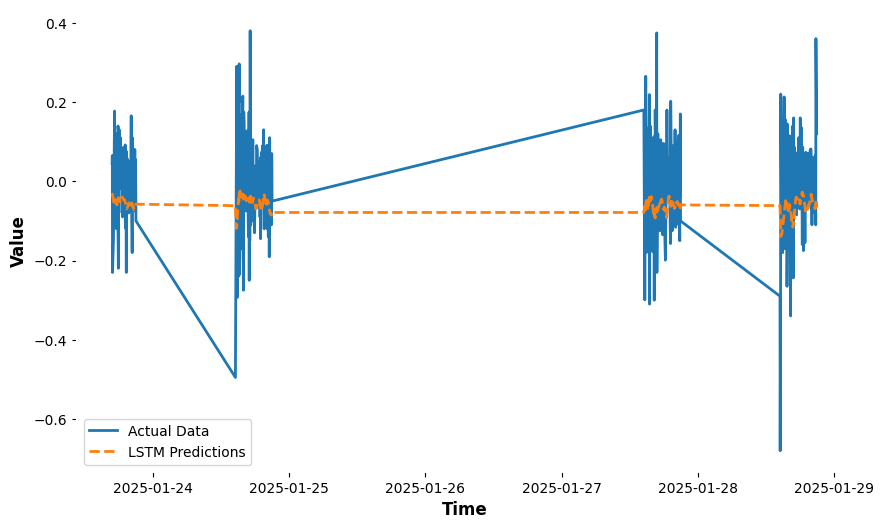

In [86]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [87]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

-6907.970818422089


In [89]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(10):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


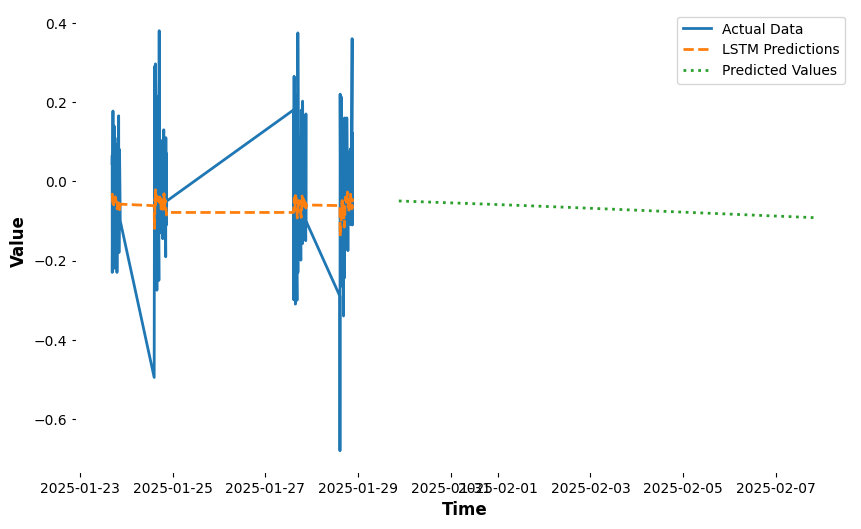

In [92]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
# Changed this to match the number of predicted values (10)
future_dates = pd.date_range(start=test_data.index[-1], periods=10 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [93]:
# save as plk
predictions.to_pickle('predictions.pkl')